## Import the libraries

In [1]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt    

In [2]:
data = pd.read_csv("crime_data.csv");
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


## Standardize the data

In [4]:
## Standardize the datafrom sklearn.preprocessing import StandardScaler
SS = StandardScaler()
data_ss = pd.DataFrame(SS.fit_transform(data.iloc[:, 1:]))
data_ss.columns = list(data.iloc[:, 1:])

In [5]:
data_ss

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


In [6]:
X = data_ss.values
X   

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

### Getting the best epsilon value

In [8]:
from sklearn.neighbors import NearestNeighbors  

In [9]:
neigh = NearestNeighbors(n_neighbors=8)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)  

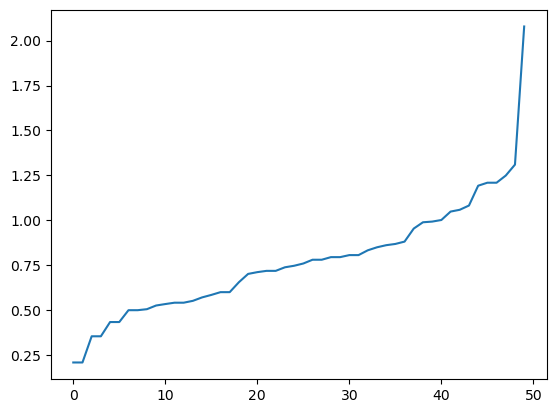

In [10]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

The curve shifts around 1.375. So we can take eps value as **1.375**

## Fitting the model

In [11]:
dbscan = DBSCAN(eps=1.375, min_samples=5)
dbscan.fit(X) 

DBSCAN(eps=1.375)

In [12]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [13]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [14]:
pd.set_option("display.max_rows", None)  

In [15]:
cl

,cluster
0,0
1,-1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [16]:
data1 = pd.concat([data,cl],axis=1)  

In [17]:
data1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [18]:
import matplotlib.pyplot as plt
plt.style.use('classic') 

Text(0.5, 1.0, 'Clusters using DBScan')

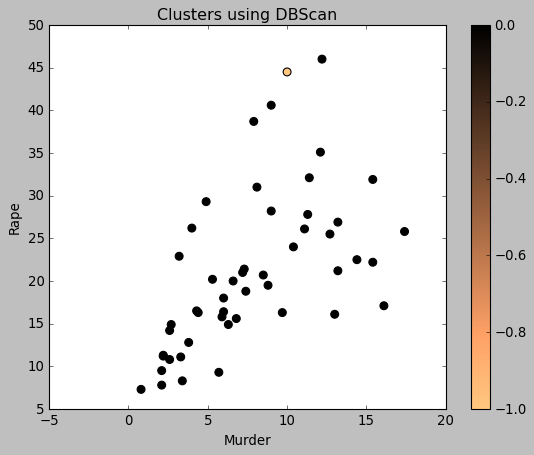

In [19]:
data1.plot(x="Murder",y ="Rape",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using DBScan') 

In [20]:
dl = dbscan.labels_

In [22]:
import sklearn
sklearn.metrics.silhouette_score(X, dl) 

0.23455598753159795

## Verifying with KMeans clustering method

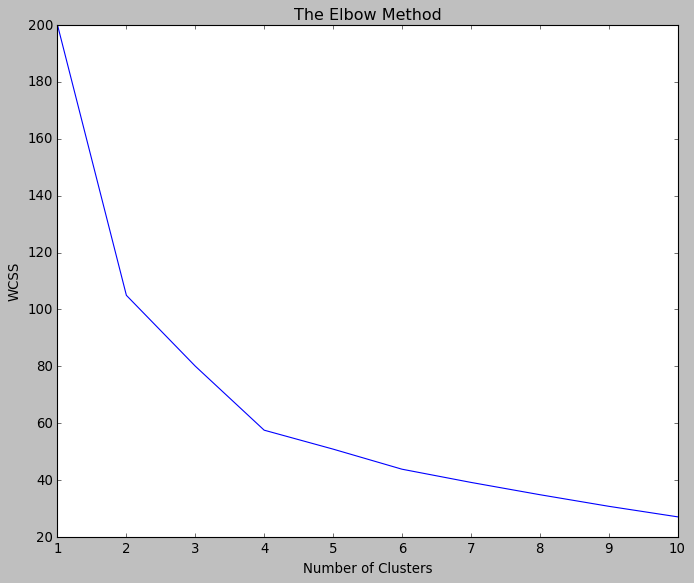

In [23]:
## Verifying with KMeans clustering methodfrom sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(data_ss)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show() 

In [24]:
clf = KMeans(n_clusters=4)
y_kmeans = clf.fit_predict(X)  

In [25]:
y_kmeans

array([3, 0, 0, 3, 0, 0, 1, 1, 0, 3, 1, 2, 0, 1, 2, 1, 2, 3, 2, 0, 1, 0,
       2, 3, 0, 2, 2, 0, 2, 1, 0, 0, 3, 2, 1, 1, 1, 1, 1, 3, 2, 3, 0, 1,
       2, 1, 1, 2, 2, 1])

In [26]:
cl1=pd.DataFrame(y_kmeans,columns=['Kcluster']) 
cl1 

,Kcluster
0,3
1,0
2,0
3,3
4,0
5,0
6,1
7,1
8,0
9,3


In [27]:
data2 = pd.concat([data1,cl1],axis=1) 
data2 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster,Kcluster
0,Alabama,13.2,236,58,21.2,0,3
1,Alaska,10.0,263,48,44.5,-1,0
2,Arizona,8.1,294,80,31.0,0,0
3,Arkansas,8.8,190,50,19.5,0,3
4,California,9.0,276,91,40.6,0,0
5,Colorado,7.9,204,78,38.7,0,0
6,Connecticut,3.3,110,77,11.1,0,1
7,Delaware,5.9,238,72,15.8,0,1
8,Florida,15.4,335,80,31.9,0,0
9,Georgia,17.4,211,60,25.8,0,3


Text(0.5, 1.0, 'Clusters using KMeans')

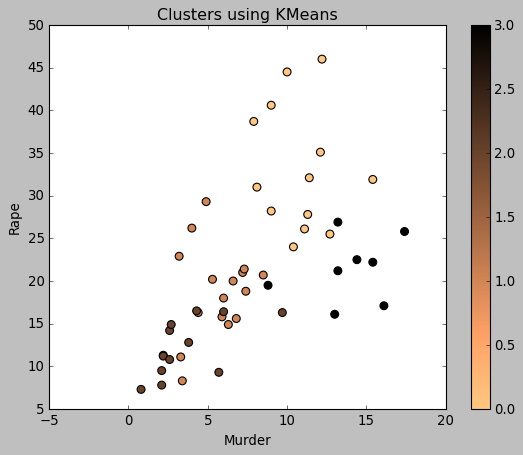

In [28]:
data2.plot(x="Murder",y ="Rape",c=y_kmeans ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using KMeans')   

In [29]:
sklearn.metrics.silhouette_score(X, y_kmeans)

0.33968891433344395

**KMeans method gave a higher Silhouette score than the DBSCAN method.**